In [24]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import math
from sklearn.metrics import confusion_matrix as CM
import random
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA

## tree importance

In [25]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [26]:
def IndOfSortedFea(feaInfo):
    """return sorted index of a list"""
    sortInfo=sorted(feaInfo,reverse=True)
    ##for test
    ##print sortInfo
    return [feaInfo.index(i) for i in sortInfo]
#a=[3,4,6,2]
#print IndOfSortedFea(a)

In [27]:
def cosine_distance(u, v):
    return np.dot(u, v) / (math.sqrt(np.dot(u, u)) * math.sqrt(np.dot(v, v)))

In [28]:
def crossValidation_forest(x,y):
    """
    version 3
    
    """
    crossErrors=[]
    confusion_matrix=[]
    #svc=svm.LinearSVC()
    rf=RFC(n_estimators=100,max_features=None)
    kf = KFold(x.shape[0], n_folds=5,shuffle=True)
    for train,test in kf:
        rf.fit(x[train],y[train])
        prediction=rf.predict(x[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors),confusion_matrix

In [29]:
def layer_rbf(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=10.,n_components=x.shape[1])
    xT=kpca.fit_transform(x)
    
    #xT=np.concatenate((x,x_kpca),axis=1)
    
#     rank=[]
    numOfFeatures=xT.shape[1]
#     for i in xrange(numOfFeatures):
#         rank.append(cosine_distance(xT[:,i],y))
    selecting_tree=RFC(n_estimators=100,max_depth=2,n_jobs=2)
    selecting_tree.fit(xT,y)
    rank=[i for i in selecting_tree.feature_importances_]
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation_forest(xT[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return xT[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [30]:
def pretrain(x,y):
#     rank=[]
#     numOfFeatures=x.shape[1]
#     for i in xrange(numOfFeatures):
#         rank.append(cosine_distance(x[:,i],y))
#     feaSelected=IndOfSortedFea(rank)
    numOfFeatures=x.shape[1]
    selecting_tree=RFC(n_estimators=100,max_depth=2,n_jobs=2)
    selecting_tree.fit(x,y)
    rank=[i for i in selecting_tree.feature_importances_]
    feaSelected=IndOfSortedFea(rank)
    
    featureSelectedErrors=[]
    for i in xrange(numOfFeatures):
        crossErrors,cms=crossValidation_forest(x[:,feaSelected[:i+1]],y)
        featureSelectedErrors.append(crossErrors)
    choice=featureSelectedErrors.index(min(featureSelectedErrors))
    return x[:,feaSelected[:choice+1]],featureSelectedErrors,cms

In [31]:
#%matplotlib inline
from matplotlib import pyplot as plt
def plotFunction(x,y,text):
    n=x.shape[1]
    cols=2
    rows=int(math.ceil(n/2.))
    fig,ax=plt.subplots(ncols=cols,nrows=rows)
    if rows==1:
        for j in range(cols):
            if j<n:
                ax[j].scatter(x[:,j],y,c='b')
    else:
        for i in range(rows):
            for j in range(cols):
                if i*cols+j<n:
                    ax[i,j].scatter(x[:,i*cols+j],y,c='b')
                    #ax[i].title('x%d'%i,fontsize='small')
    plt.title(text)
    plt.show()


In [32]:
def plotdata(x,y):
    n=x.shape[1]
    fig,ax=plt.subplots(ncols=n,nrows=n)
    fig.set_size_inches(9,6)
    for i in xrange(n):
        for j in xrange(i+1):
            for t,color in zip(xrange(3),'rgb'):
                ax[i][j].scatter(x[y == t,i],x[y == t,j],c=color)
    plt.show()
#plotdata(x,y)

In [33]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [34]:
def printCM(cm):
    """
    print cm in a nice way
    """
    for i in cm:
        print i
        print 

In [35]:
# digits=load_digits()
# x=digits.data
# y=digits.target

In [36]:
#sample=random.sample(range(len(y)), int(len(y)*0.3))
#x=x[sample]
#y=y[sample]

In [37]:
# print len(sample)
# print len(x),len(y)

In [38]:
iris=load_digits()
x=iris.data
y=iris.target

In [39]:
result,error,cm=pretrain(x,y)

In [40]:
printCM(cm)

[[27  0  0  0  1  0  0  0  0  0]
 [ 0 34  1  1  0  0  0  0  0  1]
 [ 0  0 31  0  0  0  1  0  0  0]
 [ 0  1  1 41  0  0  0  0  0  1]
 [ 0  1  0  0 44  1  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  1  0]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  1  0  0  0 35  0  0]
 [ 0  2  1  0  0  2  0  0 23  2]
 [ 0  0  0  1  0  1  0  3  0 29]]

[[28  0  0  0  0  0  0  0  1  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  2  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 2  0  0  0  1 39  2  0  0  0]
 [ 0  0  0  0  1  1 37  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  1]
 [ 1  3  2  1  0  0  0  0 31  1]
 [ 0  0  0  0  0  0  0  0  1 31]]

[[41  0  0  0  0  0  0  0  0  0]
 [ 0 40  1  0  0  0  0  0  0  0]
 [ 1  0 40  0  0  0  0  0  0  0]
 [ 0  1  1 32  0  1  0  1  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  1  0 28  0  0  0  3]
 [ 0  1  0  0  1  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  1  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 36]]

[[36

In [41]:
plotErr(error)

In [42]:
print result.shape

(1797L, 62L)


In [43]:
result1,e1,cm1=layer_rbf(result,y)
printCM(cm1)

KeyboardInterrupt: 

In [ ]:
print result1.shape

In [ ]:
plotErr(e1)

In [96]:
result2,e2,cm2=layer_rbf(result1,y)
printCM(cm2)

[[ 9  0  0]
 [ 0 12  0]
 [ 0  1  8]]

[[15  0  0]
 [ 0  5  1]
 [ 0  0  9]]

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]

[[ 7  0  0]
 [ 0  8  1]
 [ 0  1 13]]

[[ 9  0  0]
 [ 0 12  0]
 [ 0  1  8]]



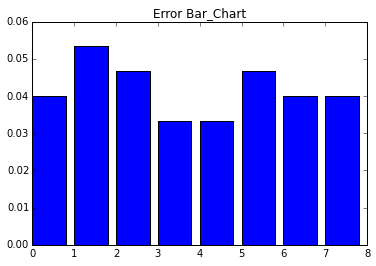

In [97]:
plotErr(e2)

In [98]:
print result2.shape

(150L, 4L)


In [99]:
result3,e3,cm3=layer_rbf(result2,y)
printCM(cm3)

[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]

[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]

[[ 5  0  0]
 [ 0 11  2]
 [ 0  1 11]]

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]



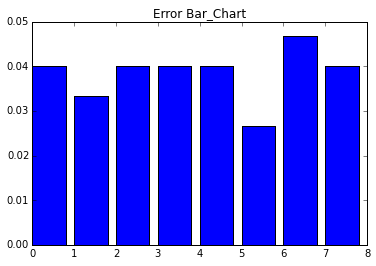

In [102]:
plotErr(e3)

In [103]:
print result3.shape

(150L, 6L)


In [100]:
result4,e4,cm4=layer_rbf(result3,y)
printCM(cm4)

[[11  0  0]
 [ 0  7  2]
 [ 0  1  9]]

[[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]



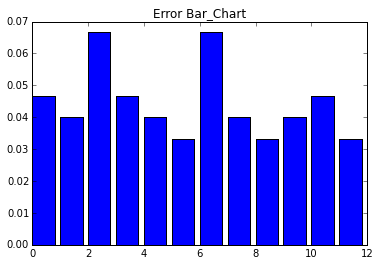

In [104]:
plotErr(e4)

In [105]:
print result4.shape

(150L, 6L)


In [106]:
result5,e5,cm5=layer_rbf(result4,y)
printCM(cm5)

[[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]

[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]

[[ 7  0  0]
 [ 0 10  0]
 [ 0  1 12]]

[[10  0  0]
 [ 0  7  1]
 [ 0  0 12]]

[[12  0  0]
 [ 0  8  2]
 [ 0  0  8]]



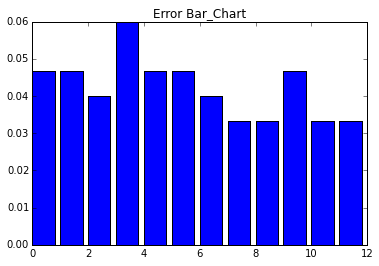

In [107]:
plotErr(e5)

In [108]:
print result5.shape

(150L, 8L)


In [109]:
result6,e6,cm6=layer_rbf(result5,y)
printCM(cm6)

[[9 0 0]
 [0 9 0]
 [0 4 8]]

[[13  0  0]
 [ 0  7  0]
 [ 0  1  9]]

[[ 8  0  0]
 [ 0 15  1]
 [ 0  0  6]]

[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]



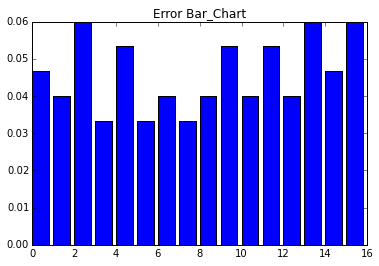

In [110]:
plotErr(e6)

In [111]:
print result6.shape

(150L, 4L)


In [115]:
result7,e7,cm7=layer_rbf(result6,y)
printCM(cm7)

[[ 4  0  0]
 [ 0 10  2]
 [ 0  1 13]]

[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

[[14  0  0]
 [ 0  9  0]
 [ 0  0  7]]

[[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]



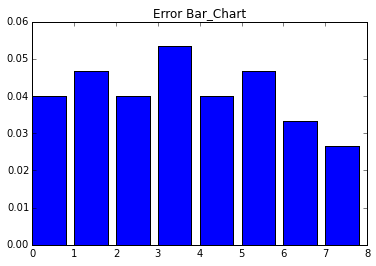

In [116]:
plotErr(e7)

In [117]:
print result7.shape

(150L, 8L)
